# House Prices Prediction Using Mechine Learning

## Problem Statement
The goal of this statistical analysis is to understand the relationship between house features and how these variables are used to predict house price.
## Objective
*   Predict the house price


## Data used: 
https://www.machinehack.com/hackathons/house_price_prediction_beat_the_benchmark/data

# Step 1: Exploratory Data Analysis (EDA)

In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import xgboost as xgb
from geopy.geocoders import Nominatim

import warnings
warnings.simplefilter('ignore')

In [2]:
#import Data

test_data = pd.read_csv('Test.csv')
train_data = pd.read_csv('Train.csv')

In [3]:
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [4]:
#geting some information about the test_data

test_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [5]:
#geting some information about the train_data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
#Checking for duplicates 

train_data.duplicated().sum()

401

In [7]:
# drop duplicates 
train_data.drop_duplicates(inplace=True)

In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
#checking the column names

train_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [11]:
#Renameing 'TARGET(PRICE_IN_LACS)' to 'PRICE'

train_data.rename(columns={'TARGET(PRICE_IN_LACS)':'PRICE'}, inplace=True)

In [12]:
#checking changed column names 

train_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'PRICE'],
      dtype='object')

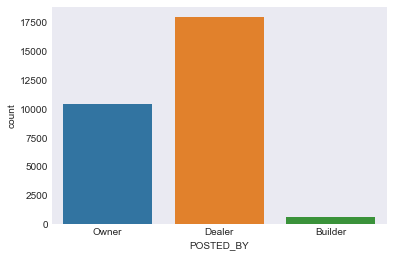

In [13]:
#visualizing 'POSTED_BY' filed

sns.countplot(train_data.POSTED_BY)

In [14]:
#Relation between 'PRICE' and 'POSTED_BY'
train_data.groupby('POSTED_BY')['PRICE'].mean()

POSTED_BY
Builder    246.722294
Dealer     185.285099
Owner       60.757067
Name: PRICE, dtype: float64

In [15]:
#Creating One Hot Encoding using dummies for 'POSTED_BY' train 

train_data = pd.concat([train_data,pd.get_dummies(train_data.POSTED_BY, prefix='POSTED_BY',drop_first=False)],axis=1) 

In [16]:
#Creating One Hot Encoding using dummies for 'POSTED_BY' test

test_data = pd.concat([test_data,pd.get_dummies(test_data.POSTED_BY, prefix='POSTED_BY',drop_first=False)],axis=1) 

In [17]:
# It seems like the avarage price of the flat depends on the order: Builder > Dealer >Owner    

# posted_by_map = {'Builder':3, 'Dealer':2, 'Owner':1}

# train_data.POSTED_BY = train_data.POSTED_BY.map(posted_by_map)

# test_data.POSTED_BY = test_data.POSTED_BY.map(posted_by_map)

train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0


In [18]:
#Visualzation for 'BHK_OR_RK'

train_data.groupby('BHK_OR_RK').count()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
BHK_OR_RK,,,,,,,,,,,,,,
BHK,29026,29026,29026,29026,29026,29026,29026,29026,29026,29026,29026,29026,29026,29026
RK,24,24,24,24,24,24,24,24,24,24,24,24,24,24


In [19]:
#creating label encoding for BHK_OR_RK

BHK_OR_RK_map = {'BHK':2, 'RK':1 }

train_data.BHK_OR_RK = train_data.BHK_OR_RK.map(BHK_OR_RK_map)

test_data.BHK_OR_RK = test_data.BHK_OR_RK.map(BHK_OR_RK_map)

train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,Owner,0,0,2,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,Dealer,0,0,2,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,Owner,0,0,2,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,Owner,0,1,2,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,Dealer,1,0,2,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0


In [20]:
#Extracting city name from ADDRESS filed and creating new feature CITY in train

train_data['CITY'] = train_data.ADDRESS.apply(lambda x: x.split(',')[-1])

In [21]:
#all avalable distinct city name

train_data['CITY'].sort_values(ascending =True).unique()

array(['Agartala', 'Agra', 'Ahmednagar', 'Ajmer', 'Akola', 'Aligarh',
       'Allahabad', 'Alwar', 'Ambala', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Angul', 'Arrah', 'Asansol', 'Aurangabad',
       'Baddi', 'Bahadurgarh', 'Balasore', 'Bangalore', 'Bankura',
       'Banswara', 'Barabanki', 'Bardhaman', 'Bareilly', 'Beed',
       'Belgaum', 'Berhampur', 'Betul', 'Bhadrak', 'Bhagalpur',
       'Bhandara', 'Bharatpur', 'Bharuch', 'Bhavnagar', 'Bhilai',
       'Bhimavaram', 'Bhiwadi', 'Bhiwani', 'Bhopal', 'Bhubaneswar',
       'Bhuj', 'Bikaner', 'Bilaspur', 'Bokaro', 'Chandigarh',
       'Chandrapur', 'Chennai', 'Chhindwara', 'Chittoor', 'Coimbatore',
       'Cuddalore', 'Cuttack', 'Dahod', 'Dalhousie', 'Darbhanga',
       'Darjeeling', 'Dehradun', 'Deoghar', 'Dhanbad', 'Dharuhera',
       'Dharwad', 'Dhule', 'Dibrugarh', 'Durg', 'Durgapur', 'Eluru',
       'Ernakulam', 'Erode', 'Faizabad', 'Faridabad', 'Gadarwara',
       'Gadhinglaj', 'Gandhidham', 'Gandhinagar', '

In [22]:
#Visualizing relation between Price and City

city = train_data.groupby('CITY')['PRICE'].mean().reset_index().sort_values(by='PRICE',ascending =False)

<Figure size 1080x2880 with 0 Axes>

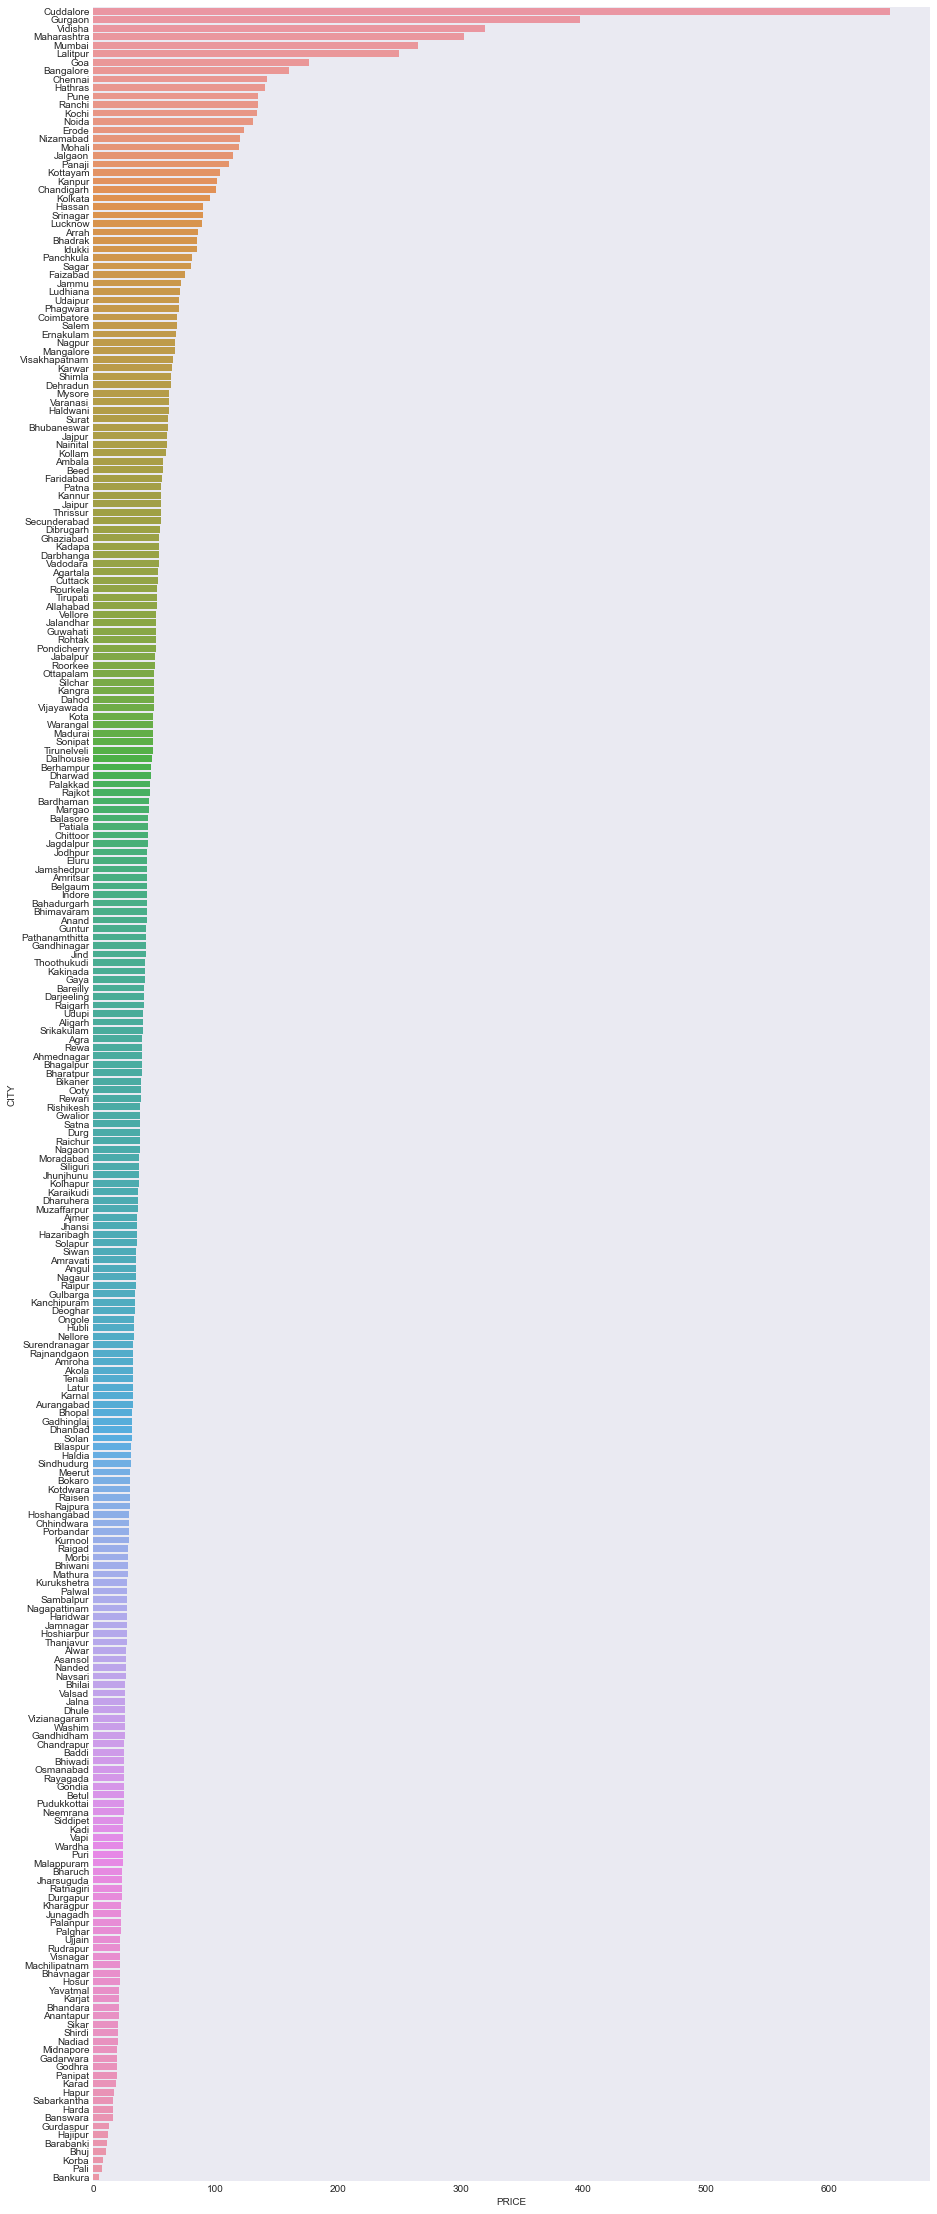

In [23]:
plt.figure(figsize=(15,40))
sns.barplot(x='PRICE',y='CITY',data=city)

In [24]:
#Creating a new feature CITY_BIN after grouping citys on basis of avarage huse price in train

train_data['CITY_BIN']=train_data.CITY.apply( lambda x: 10 if x=='Gurgaon' else ( 
9 if x in ('Vidisha','Maharashtra') else (
8 if x in ('Mumbai','Lalitpur') else (  
7 if x in ('Goa')  else (
6 if x in ('Bangalore','Chennai','Hathras','Pune','Ranchi','Kochi','Noida','Erode','Nizamabad','Jalgaon','Mohali','Panaji','Kanpur','Kottayam','Chandigarh') else (
5 if x in ('Kolkata','Srinagar','Hassan','Lucknow','Arrah','Bhadrak','Idukki','Panchkula','Sagar','Faizabad','Jammu','Ludhiana') else (
4 if x in ('Udaipur','Phagwara','Coimbatore','Salem','Ernakulam','Nagpur','Mangalore','Visakhapatnam','Karwar','Shimla','Dehradun','Mysore','Varanasi','Haldwani','Surat',
           'Bhubaneswar','Jajpur','Nainital','Kollam','Ambala','Beed','Faridabad','Patna','Kannur','Jaipur','Thrissur','Secunderabad','Dibrugarh','Ghaziabad','Vadodara',
           'Kadapa','Darbhanga','Agartala','Cuttack','Rourkela','Tirupati','Allahabad','Vellore','Jalandhar','Guwahati','Rohtak','Pondicherry','Jabalpur')else (
3 if x in ('Roorkee','Silchar',
           'Kangra','Ottapalam','Dahod','Vijayawada','Kota','Warangal','Madurai','Sonipat','Tirunelveli','Dalhousie','Rajkot','Berhampur','Dharwad','Palakkad','Jind',
           'Bardhaman','Margao','Balasore','Patiala','Chittoor','Jagdalpur','Kakinada','Jodhpur','Eluru','Amritsar','Belgaum','Indore','Bahadurgarh','Bhimavaram','Anand',
           'Guntur','Gandhinagar','Pathanamthitta','Thoothukudi','Jamshedpur','Gaya','Aligarh','Bareilly','Darjeeling','Raigarh','Udupi','Srikakulam','Agra','Rewa','Bhagalpur',
           'Bharatpur','Bikaner','Ooty','Rewari','Rishikesh','Gwalior','Satna','Durg','Raichur','Nagaon','Moradabad','Siliguri','Jhunjhunu','Kolhapur','Karaikudi','Dharuhera',
           'Muzaffarpur','Ajmer','Jhansi','Hazaribagh','Solapur','Siwan','Amravati','Raipur') else (
2 if x in ('Angul','Nagaur','Gulbarga','Kanchipuram','Deoghar','Ongole','Hubli','Solan','Nellore','Amroha','Rajnandgaon','Surendranagar','Akola','Tenali','Latur','Karnal','Aurangabad',
           'Bhopal','Gadhinglaj','Dhanbad','Bilaspur','Meerut','Sindhudurg','Bokaro','Haldia','Raisen','Kotdwara','Rajpura','Hoshangabad','Raigad','Chhindwara','Mathura','Porbandar',
           'Kurnool','Morbi','Palwal','Nagapattinam','Sambalpur','Kurukshetra','Jamnagar','Haridwar','Hoshiarpur','Thanjavur','Alwar','Asansol','Nanded','Navsari','Bhilai','Valsad',
           'Jalna','Dhule','Vizianagaram','Washim','Gandhidham','Chandrapur','Baddi','Bhiwadi','Gondia','Osmanabad','Betul','Rayagada','Pudukkottai','Neemrana','Siddipet','Kadi',
           'Vapi','Wardha','Puri','Malappuram','Bharuch','Jharsuguda','Ratnagiri','Durgapur','Kharagpur','Junagadh','Palanpur','Palghar','Ujjain','Rudrapur','Machilipatnam',
           'Visnagar','Bhavnagar','Hosur','Yavatmal','Karjat','Bhandara','Anantapur','Sikar','Shirdi','Nadiad','Gadarwara','Midnapore','Godhra','Panipat','Karad','Bhiwani','Hapur',
           'Sabarkantha','Harda','Banswara') else (
1

))))))))))

In [25]:
#Extracting city name from ADDRESS filed and creating new feature CITY in test

test_data['CITY'] = test_data.ADDRESS.apply(lambda x: x.split(',')[-1])

In [26]:
#Creating a new feature CITY_BIN after grouping citys on basis of avarage huse price in test

test_data['CITY_BIN']=test_data.CITY.apply( lambda x: 10 if x=='Gurgaon' else ( 
9 if x in ('Vidisha','Maharashtra') else (
8 if x in ('Mumbai','Lalitpur') else (  
7 if x in ('Goa')  else (
6 if x in ('Bangalore','Chennai','Hathras','Pune','Ranchi','Kochi','Noida','Erode','Nizamabad','Jalgaon','Mohali','Panaji','Kanpur','Kottayam','Chandigarh') else (
5 if x in ('Kolkata','Srinagar','Hassan','Lucknow','Arrah','Bhadrak','Idukki','Panchkula','Sagar','Faizabad','Jammu','Ludhiana') else (
4 if x in ('Udaipur','Phagwara','Coimbatore','Salem','Ernakulam','Nagpur','Mangalore','Visakhapatnam','Karwar','Shimla','Dehradun','Mysore','Varanasi','Haldwani','Surat',
           'Bhubaneswar','Jajpur','Nainital','Kollam','Ambala','Beed','Faridabad','Patna','Kannur','Jaipur','Thrissur','Secunderabad','Dibrugarh','Ghaziabad','Vadodara',
           'Kadapa','Darbhanga','Agartala','Cuttack','Rourkela','Tirupati','Allahabad','Vellore','Jalandhar','Guwahati','Rohtak','Pondicherry','Jabalpur')else (
3 if x in ('Roorkee','Silchar',
           'Kangra','Ottapalam','Dahod','Vijayawada','Kota','Warangal','Madurai','Sonipat','Tirunelveli','Dalhousie','Rajkot','Berhampur','Dharwad','Palakkad','Jind',
           'Bardhaman','Margao','Balasore','Patiala','Chittoor','Jagdalpur','Kakinada','Jodhpur','Eluru','Amritsar','Belgaum','Indore','Bahadurgarh','Bhimavaram','Anand',
           'Guntur','Gandhinagar','Pathanamthitta','Thoothukudi','Jamshedpur','Gaya','Aligarh','Bareilly','Darjeeling','Raigarh','Udupi','Srikakulam','Agra','Rewa','Bhagalpur',
           'Bharatpur','Bikaner','Ooty','Rewari','Rishikesh','Gwalior','Satna','Durg','Raichur','Nagaon','Moradabad','Siliguri','Jhunjhunu','Kolhapur','Karaikudi','Dharuhera',
           'Muzaffarpur','Ajmer','Jhansi','Hazaribagh','Solapur','Siwan','Amravati','Raipur') else (
2 if x in ('Angul','Nagaur','Gulbarga','Kanchipuram','Deoghar','Ongole','Hubli','Solan','Nellore','Amroha','Rajnandgaon','Surendranagar','Akola','Tenali','Latur','Karnal','Aurangabad',
           'Bhopal','Gadhinglaj','Dhanbad','Bilaspur','Meerut','Sindhudurg','Bokaro','Haldia','Raisen','Kotdwara','Rajpura','Hoshangabad','Raigad','Chhindwara','Mathura','Porbandar',
           'Kurnool','Morbi','Palwal','Nagapattinam','Sambalpur','Kurukshetra','Jamnagar','Haridwar','Hoshiarpur','Thanjavur','Alwar','Asansol','Nanded','Navsari','Bhilai','Valsad',
           'Jalna','Dhule','Vizianagaram','Washim','Gandhidham','Chandrapur','Baddi','Bhiwadi','Gondia','Osmanabad','Betul','Rayagada','Pudukkottai','Neemrana','Siddipet','Kadi',
           'Vapi','Wardha','Puri','Malappuram','Bharuch','Jharsuguda','Ratnagiri','Durgapur','Kharagpur','Junagadh','Palanpur','Palghar','Ujjain','Rudrapur','Machilipatnam',
           'Visnagar','Bhavnagar','Hosur','Yavatmal','Karjat','Bhandara','Anantapur','Sikar','Shirdi','Nadiad','Gadarwara','Midnapore','Godhra','Panipat','Karad','Bhiwani','Hapur',
           'Sabarkantha','Harda','Banswara') else (
1

))))))))))

In [27]:
#Creating new feature 'SQUARE_FT_BIN' on basis of PRICE

train_data['SQUARE_FT_BIN'] =train_data['SQUARE_FT'].apply(lambda x: 1 if x < 500 else(
    2 if x <800 and x >=500 else (
    3 if x <1000 and x >=800 else (
    4 if x < 1300 and x >=1000 else (
    5 if x <2000 and x >= 1300 else (
    6 if x<3000 and x>=2000 else 7
    ))))))

In [28]:
train_data.groupby('SQUARE_FT_BIN')['PRICE'].mean()

SQUARE_FT_BIN
1      41.441292
2      51.739214
3      62.746382
4      73.822448
5     108.719762
6     217.633238
7    1540.497133
Name: PRICE, dtype: float64

In [29]:
#Creating a new feature combining AREA and CITY so that we can capture variation of Price per city area wise.

train_data['AREA_CITY'] = train_data['CITY'] + train_data['SQUARE_FT_BIN'].astype(str)

In [30]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY,CITY_BIN,SQUARE_FT_BIN,AREA_CITY
0,Owner,0,0,2,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,Bangalore,6,5,Bangalore5
1,Dealer,0,0,2,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,Mysore,4,4,Mysore4
2,Owner,0,0,2,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,Bangalore,6,3,Bangalore3
3,Owner,0,1,2,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1,Ghaziabad,4,3,Ghaziabad3
4,Dealer,1,0,2,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0,Kolkata,5,3,Kolkata3


In [31]:
#Checking the value for a perticular city(here kolkata)
train_data[train_data['CITY']=='Kolkata'].AREA_CITY.unique()

array(['Kolkata3', 'Kolkata2', 'Kolkata5', 'Kolkata4', 'Kolkata7',
       'Kolkata6', 'Kolkata1'], dtype=object)

In [32]:
city_area = train_data.groupby('AREA_CITY')['PRICE'].mean().reset_index().sort_values(by='PRICE',ascending =False)

In [33]:
#Bining AREA_CITY feature under a new feature AREA_CITY_BIN in train

train_data['AREA_CITY_BIN']= train_data['AREA_CITY'].apply(lambda x: 16 if x in ('Ranchi7','Nagpur7','Chennai7','Mumbai7','Maharashtra7','Goa7','Lalitpur7','Chandigarh7',
          'Pune7','Bangalore7','Kanpur7','Gurgaon7','Lucknow7','Kolkata7','Kochi7','Mohali7','Noida7','Maharashtra6','Kottayam7','Lalitpur6','Mumbai6','Visakhapatnam7') else (
15 if x in ('Vadodara7','Udaipur7','Vidisha7','Mangalore7','Mumbai5','Surat7','Maharashtra5','Lalitpur5','Erode7','Panchkula7','Faridabad7','Panaji6','Kanpur6','Sindhudurg6',
            'Bhubaneswar7') else (
14 if x in ('Bangalore6','Pune6','Jalgaon2','Siliguri7','Chennai6','Coimbatore7','Gurgaon6','Jaipur7','Kolkata6','Jodhpur6','Ahmednagar1','Kochi6','Nagpur6','Indore7','Panaji7',
            'Mumbai4','Panaji5','Maharashtra4','Ernakulam6','Noida6','Lalitpur4') else (
13 if x in ('Patna6','Haldwani7','Coimbatore6','Varanasi7','Ghaziabad7','Mysore6','Durg7','Hathras5','Maharashtra3','Ghaziabad6','Mumbai3','Lalitpur3','Vijayawada6','Latur6','Idukki6',
            'Amritsar6','Guwahati6','Jaipur6') else (
12 if x in ('Mangalore6','Lucknow6','Ranchi6','Secunderabad7','Visakhapatnam6','Pune5','Nizamabad7','Goa6','Ludhiana6','Gurgaon5','Shimla6','Sonipat7','Jamshedpur7','Kota6',
            'Bhubaneswar6','Thrissur7','Panchkula6','Mohali6','Surat6','Udaipur6','Dehradun6','Bangalore5','Rajkot6') else (
11 if x in ('Karwar5','Anand2','Rajkot5','Ludhiana7','Chennai5','Bhopal7','Thrissur6','Indore6','Arrah5','Shimla5','Kottayam6','Secunderabad6','Kolkata5','Maharashtra2','Agra6',
            'Chandigarh6','Anand7','Hassan5','Srinagar5','Belgaum6','Faridabad6','Mumbai2','Nainital7','Gurgaon4','Udupi6','Nainital4','Jabalpur5','Panaji4','Udupi7','Noida5',
            'Dehradun7','Goa5','Bardhaman6','Bhadrak7','Kollam2','Tirunelveli6','Jalandhar7','Lalitpur2','Jammu5','Vadodara6','Allahabad5','Gandhinagar7') else (
10 if x in ('Varanasi5','Kanpur5','Kolhapur6','Jamshedpur6','Valsad7','Sagar6','Dharuhera6','Kottayam5','Sonipat6','Kochi5','Coimbatore5','Madurai5','Panchkula5','Kollam5',
            'Nagpur5','Pondicherry5','Pune4','Ludhiana5','Solapur5','Kanchipuram5','Faizabad6','Margao5','Arrah4','Ernakulam5','Tirupati6','Ghaziabad5','Thrissur5','Bhubaneswar5',
            'Kakinada5','Gandhinagar6','Siliguri6','Mangalore5','Aurangabad5','Gurgaon3','Bhopal6','Visakhapatnam5','Goa4','Hubli6','Solan6','Phagwara7','Mysore5','Dehradun5',
            'Lucknow5','Salem4','Salem5','Shimla4','Junagadh7','Secunderabad5','Jalandhar6','Kota7','Moradabad6','Navsari6','Rohtak6','Belgaum5','Kannur5','Mumbai1','Bareilly5',
            'Vijayawada5','Guwahati5','Mohali5') else (
9 if x in ('Patna5','Dalhousie5','Gwalior6','Lalitpur1','Gandhinagar5','Bangalore4','Chandigarh5','Chennai4','Panchkula4','Raigad5','Maharashtra1','Bahadurgarh6','Raipur6','Rewari6',
           'Haldwani5','Jajpur5','Ranchi5','Jhansi5','Raigad6','Ahmednagar5','Pondicherry7','Vapi6','Jammu4','Surat5','Erode3','Jaipur3','Udaipur5','Kadapa5','Udupi5','Ambala7',
           'Faridabad5','Varanasi4','Rudrapur6','Rohtak5','Cuttack4','Palakkad5','Guntur5','Mysore3','Beed7','Berhampur5','Solan5','Bikaner5','Jaipur5','Mysore4','Meerut6') else (
8 if x in ('Hubli5','Kolkata4','Jammu7','Warangal5','Noida4','Dibrugarh4','Bikaner7','Gwalior1','Ajmer6','Bharuch7','Margao4','Jodhpur5','Chandigarh4','Madurai4','Bardhaman5',
           'Tirunelveli5','Ambala6','Tirupati5','Pune3','Cuttack5','Darbhanga4','Kottayam4','Indore5','Eluru5','Gulbarga5','Agartala3','Roorkee4','Agra5','Rajkot3','Ludhiana3',
           'Patna4','Dharwad5','Rourkela5','Panaji3','Srikakulam5','Jodhpur4','Bhimavaram5','Vellore4','Jalandhar5','Kota5','Bhagalpur5','Amravati5','Jamshedpur5','Bhilai6',
           'Tirupati4','Muzaffarpur5') else (
7 if x in ('Coimbatore4','Rajkot4','Bahadurgarh5','Kolhapur4','Ottapalam5','Nainital5','Kollam4','Kangra7','Ratnagiri6','Silchar5','Moradabad5','Dahod4','Kochi4','Asansol5','Sonipat5',
           'Gaya5','Goa3','Kadapa4','Kannur4','Allahabad4','Raigarh4','Siliguri5','Ajmer5','Patna1','Palghar5','Aligarh6','Pondicherry4','Ludhiana4','Dehradun4','Mysore2','Vadodara5',
           'Akola5','Kanchipuram4','Pathanamthitta5','Secunderabad4','Hoshangabad3','Aligarh5','Amritsar5','Chennai3','Karnal5','Thrissur4','Mangalore4','Kanpur4','Raipur5','Jind5',
           'Lucknow4','Ghaziabad4','Hosur5','Akola4','Thoothukudi4','Aurangabad4','Ernakulam4','Bangalore3','Jalgaon4','Jagdalpur5','Ujjain5','Karjat4','Chittoor4','Patiala5',
           'Bardhaman4','Bilaspur2','Balasore4','Satna4','Roorkee3','Dalhousie3','Anantapur5','Allahabad3','Gwalior5','Bhavnagar5','Jabalpur4','Guwahati4','Kanchipuram3','Cuttack3',
           'Vizianagaram5','Bhubaneswar4','Kolkata3','Durg5','Dharwad4','Tirunelveli4','Bharuch5','Rishikesh4','Gandhidham4','Haridwar5','Nagpur4','Junagadh5','Ranchi4','Meerut5',
           'Eluru4','Jamnagar5','Guntur4','Rewari5','Nellore6','Hazaribagh5','Vapi5','Sonipat2','Bhimavaram4','Darjeeling5','Raigad4','Jalna5','Nellore5','Belgaum4','Shimla2',
           'Varanasi3','Shimla3','Bhopal5','Pondicherry3','Neemrana5','Alwar5','Ongole5','Jalgaon1') else (
6 if x in ('Jamshedpur4','Faridabad4','Goa1','Rewa4','Anand6','Sikar5','Satna5','Bharatpur5','Kota4','Ooty2','Bareilly4','Mathura5','Pune2','Noida3','Dharuhera5','Durgapur5',
           'Kakinada4','Idukki5','Wardha5','Gandhidham5','Jalgaon3','Guwahati3','Coimbatore3','Kanpur3','Vijayawada4','Visakhapatnam4','Kochi3','Tenali5','Udupi4','Dehradun3',
           'Gandhinagar4','Patna3','Dhanbad5','Goa2','Raichur5','Nagaon4','Bhiwadi6','Morbi4','Belgaum3','Ajmer4','Mohali4','Ahmednagar4','Palghar4','Surat4','Jhunjhunu5','Panaji2',
           'Nainital2','Haridwar4','Udaipur4','Thoothukudi3','Mathura3','Palakkad4','Chandigarh3','Karaikudi4','Solapur4','Bahadurgarh4','Gwalior4','Valsad5','Bangalore1','Bangalore2',
           'Ernakulam3','Lucknow3','Tirunelveli3','Muzaffarpur4','Amritsar4','Vijayawada7','Puri3','Madurai3','Thanjavur5','Bhagalpur4','Thanjavur3','Bilaspur5','Amravati3','Pathanamthitta4',
           'Bhiwadi5','Agra7','Gaya4','Mangalore3','Siwan5','Secunderabad3','Bokaro5','Jabalpur3','Kolhapur3','Hoshiarpur5','Chandrapur5','Nagaur3','Angul3','Berhampur4','Gadhinglaj3',
           'Kharagpur4','Kakinada3','Srikakulam4','Gwalior3','Dalhousie2','Tenali4','Margao3','Kannur3','Jaipur4','Solapur3','Rohtak4','Ranchi3','Chennai2','Solan4','Jhansi4',
           'Ratnagiri4','Ahmednagar3','Deoghar4','Visakhapatnam3','Raigad3','Ghaziabad3','Aligarh4','Bhubaneswar3','Agra4','Bhilai5','Vapi4','Amravati4','Amravati2','Thrissur3',
           'Hubli4','Rajnandgaon4','Berhampur3','Madurai2','Jalandhar4','Surendranagar5','Amroha4','Nellore4','Bhopal4','Nagpur3','Ratnagiri3','Jodhpur3','Ernakulam2','Varanasi2',
           'Gurgaon2','Siliguri4','Indore4','Nainital3','Dharuhera3','Raipur4','Neemrana3','Vadodara4','Bardhaman3','Dhule4','Sonipat4','Guwahati2','Neemrana4','Rajkot2','Gulbarga4',
           'Kolhapur2','Raigarh2','Navsari5','Kota3','Moradabad4','Anand5','Surat2','Dharuhera4','Belgaum2','Palakkad3','Meerut4') else (   
5 if x in ('Gadhinglaj4','Faridabad3','Bilaspur4','Hazaribagh4','Allahabad2','Haridwar3','Raisen5','Kotdwara4','Nanded2','Warangal4','Sindhudurg3','Nanded3','Karnal3','Ongole4','Aurangabad3',
           'Haldia3','Satna3','Rajpura5','Panipat6','Udaipur3','Bhubaneswar2','Palwal4','Palghar3','Jamshedpur3','Vijayawada3','Porbandar2','Chhindwara2','Pune1','Karnal7','Porbandar5',
           'Karwar4','Kurnool4','Rishikesh3','Chandrapur2','Udupi3','Chandrapur4','Jodhpur2','Vizianagaram4','Jamnagar4','Tirupati3','Alwar4','Noida2','Bilaspur3','Panchkula2',
           'Kurukshetra1','Gaya3','Kadi5','Hapur4','Nagapattinam2','Palwal5','Moradabad3','Sambalpur4','Kanpur2','Dhanbad4','Bahadurgarh3','Hubli3','Ghaziabad2','Gwalior2','Sonipat3',
           'Kochi2','Coimbatore2','Aurangabad6','Bhiwadi4','Latur3','Durgapur4','Kolkata2','Karnal4','Godhra4','Puri2','Sindhudurg4','Ongole3','Latur4','Raipur3','Faridabad2','Asansol4',
           'Mathura4','Lucknow2','Meerut3','Wardha4','Nagpur2','Dhanbad3','Raigad2','Dhule3','Guntur3','Jalandhar3','Solan3','Baddi4','Washim3','Indore3','Gulbarga3','Morbi3',
           'Mangalore2','Siliguri3') else (
4 if x in ('Palakkad2','Rudrapur4','Ranchi2','Agra3','Bharuch4','Anand4','Rayagada3','Pondicherry2','Pudukkottai2','Betul4','Baddi2','Yavatmal3','Margao2','Hosur3','Durg4','Gondia4',
           'Chandigarh1','Osmanabad2','Bhavnagar6','Aurangabad2','Siddipet3','Surat3','Meerut1','Vadodara3','Gandhinagar3','Dehradun2','Asansol3','Navsari4','Chennai1','Shirdi2',
           'Bhilai4','Malappuram2','Nadiad4','Bhandara4','Jharsuguda5','Nanded4','Thrissur2','Valsad4','Vijayawada2','Tenali3','Durg2','Visakhapatnam2','Secunderabad1','Gandhinagar2',
           'Bhopal3','Amritsar2','Jabalpur2','Eluru3','Kota2','Karjat3','Palanpur4','Karad4','Thanjavur4','Guwahati1','Hubli2','Chandigarh2','Latur7','Kharagpur3','Karad3','B',
           'hopal2','Bokaro4','Aligarh3','Rewari4','Jamnagar3','Mohali2','Machilipatnam2','Dhanbad2','Visnagar4','Karnal2','Jabalpur1','Patna2','Bahadurgarh2','Bhavnagar3','Akola2',
           'Vizianagaram3','Noida1','Nellore3','Rudrapur3','Agra2','Palwal3','Hazaribagh3','Rewari2','Hoshangabad4','Nadiad3','Kadi4','Jhansi2') else (
3 if x in ('Bhiwadi3','Haridwar2','Bhavnagar4','Mohali3','Anand3','Ahmednagar2','Dehradun1','Durgapur3','Palghar2','Junagadh3','Kanchipuram2','Midnapore2','Meerut7','Gadarwara2',
           'Haldwani2','Morbi2','Solan2','Haldwani3','Hoshiarpur7','Guntur2','Vadodara2','Valsad3','Varanasi1','Siliguri2','Jamshedpur2','Raigad1','Vapi3','Navsari2','Udupi2',
           'Sindhudurg2','Panchkula1','Jaipur2','Ratnagiri2','Durg3','Ujjain2','Karjat2','Secunderabad2','Ajmer3','Coimbatore1','Kolhapur1','Mathura2','Gandhidham3','Rajkot1',
           'Solapur2','Jalna2','Latur2','Ghaziabad1','Faridabad1','Sonipat1','Lucknow1','Nadiad2','Durgapur2','Yavatmal2','Jalgaon5','Kollam3','Palghar1','Bharuch3','Vapi2',
           'Chandrapur3','Valsad2','Kharagpur2','Ludhiana2','Gandhinagar1','Neemrana1','Karjat1','Raipur2','Mangalore1','Bhiwani2','Bhopal1','Wardha3','Thrissur1','Karad2','Junagadh4',
           'Jamnagar2','Sabarkantha3','Indore2','Udaipur2','Junagadh2','Neemrana2','Visakhapatnam1','Kolkata1','Bhavnagar2','Ranchi1','Banswara2','Harda2','Allahabad1') else (
2 if x in ('Vadodara1','Dhule2','Meerut2','Dharuhera2','Bhilai1','Bhiwadi2','Bhandara3','Bhilai3','Anantapur2','Nagpur1','Panipat1','Amravati1','Gandhidham2','Thanjavur2','Karad1',
           'Barabanki2','Nainital1','Wardha2','Nellore1','Madurai1','Shirdi1','Bharuch1','Agra1','Jaipur1','Mohali1','Valsad1','Haridwar1','Nellore2','Moradabad2','Ajmer2','Bharuch2',
           'Gandhidham1','Sindhudurg1','Gurdaspur2','Bhiwadi1','Panipat4','Jalandhar2','Rudrapur2','Puri1','Sikar2','Asansol2','Ratnagiri1','Solan1','Gurgaon1','Kanchipuram1',
           'Ujjain1','Godhra2','Jodhpur1','Alwar1','Vizianagaram2','Hosur4','Aurangabad1','Siliguri1','Jamnagar1','Udaipur1','Hapur1','Kanpur1','Bhilai2') else 1
)))))))))))))))

In [34]:
#Creating new feature 'SQUARE_FT_BIN' on basis of PRICE

test_data['SQUARE_FT_BIN'] =test_data['SQUARE_FT'].apply(lambda x: 1 if x < 500 else(
    2 if x <800 and x >=500 else (
    3 if x <1000 and x >=800 else (
    4 if x < 1300 and x >=1000 else (
    5 if x <2000 and x >= 1300 else (
    6 if x<3000 and x>=2000 else 7
    ))))))

In [35]:
#Creating a new feature combining AREA and CITY so that we can capture variation of Price per city area wise.

test_data['AREA_CITY'] = test_data['CITY'] + test_data['SQUARE_FT_BIN'].astype(str)

In [36]:
#Bining AREA_CITY feature under a new feature AREA_CITY_BIN in test

test_data['AREA_CITY_BIN']= test_data['AREA_CITY'].apply(lambda x: 16 if x in ('Ranchi7','Nagpur7','Chennai7','Mumbai7','Maharashtra7','Goa7','Lalitpur7','Chandigarh7',
          'Pune7','Bangalore7','Kanpur7','Gurgaon7','Lucknow7','Kolkata7','Kochi7','Mohali7','Noida7','Maharashtra6','Kottayam7','Lalitpur6','Mumbai6','Visakhapatnam7') else (
15 if x in ('Vadodara7','Udaipur7','Vidisha7','Mangalore7','Mumbai5','Surat7','Maharashtra5','Lalitpur5','Erode7','Panchkula7','Faridabad7','Panaji6','Kanpur6','Sindhudurg6',
            'Bhubaneswar7') else (
14 if x in ('Bangalore6','Pune6','Jalgaon2','Siliguri7','Chennai6','Coimbatore7','Gurgaon6','Jaipur7','Kolkata6','Jodhpur6','Ahmednagar1','Kochi6','Nagpur6','Indore7','Panaji7',
            'Mumbai4','Panaji5','Maharashtra4','Ernakulam6','Noida6','Lalitpur4') else (
13 if x in ('Patna6','Haldwani7','Coimbatore6','Varanasi7','Ghaziabad7','Mysore6','Durg7','Hathras5','Maharashtra3','Ghaziabad6','Mumbai3','Lalitpur3','Vijayawada6','Latur6','Idukki6',
            'Amritsar6','Guwahati6','Jaipur6') else (
12 if x in ('Mangalore6','Lucknow6','Ranchi6','Secunderabad7','Visakhapatnam6','Pune5','Nizamabad7','Goa6','Ludhiana6','Gurgaon5','Shimla6','Sonipat7','Jamshedpur7','Kota6',
            'Bhubaneswar6','Thrissur7','Panchkula6','Mohali6','Surat6','Udaipur6','Dehradun6','Bangalore5','Rajkot6') else (
11 if x in ('Karwar5','Anand2','Rajkot5','Ludhiana7','Chennai5','Bhopal7','Thrissur6','Indore6','Arrah5','Shimla5','Kottayam6','Secunderabad6','Kolkata5','Maharashtra2','Agra6',
            'Chandigarh6','Anand7','Hassan5','Srinagar5','Belgaum6','Faridabad6','Mumbai2','Nainital7','Gurgaon4','Udupi6','Nainital4','Jabalpur5','Panaji4','Udupi7','Noida5',
            'Dehradun7','Goa5','Bardhaman6','Bhadrak7','Kollam2','Tirunelveli6','Jalandhar7','Lalitpur2','Jammu5','Vadodara6','Allahabad5','Gandhinagar7') else (
10 if x in ('Varanasi5','Kanpur5','Kolhapur6','Jamshedpur6','Valsad7','Sagar6','Dharuhera6','Kottayam5','Sonipat6','Kochi5','Coimbatore5','Madurai5','Panchkula5','Kollam5',
            'Nagpur5','Pondicherry5','Pune4','Ludhiana5','Solapur5','Kanchipuram5','Faizabad6','Margao5','Arrah4','Ernakulam5','Tirupati6','Ghaziabad5','Thrissur5','Bhubaneswar5',
            'Kakinada5','Gandhinagar6','Siliguri6','Mangalore5','Aurangabad5','Gurgaon3','Bhopal6','Visakhapatnam5','Goa4','Hubli6','Solan6','Phagwara7','Mysore5','Dehradun5',
            'Lucknow5','Salem4','Salem5','Shimla4','Junagadh7','Secunderabad5','Jalandhar6','Kota7','Moradabad6','Navsari6','Rohtak6','Belgaum5','Kannur5','Mumbai1','Bareilly5',
            'Vijayawada5','Guwahati5','Mohali5') else (
9 if x in ('Patna5','Dalhousie5','Gwalior6','Lalitpur1','Gandhinagar5','Bangalore4','Chandigarh5','Chennai4','Panchkula4','Raigad5','Maharashtra1','Bahadurgarh6','Raipur6','Rewari6',
           'Haldwani5','Jajpur5','Ranchi5','Jhansi5','Raigad6','Ahmednagar5','Pondicherry7','Vapi6','Jammu4','Surat5','Erode3','Jaipur3','Udaipur5','Kadapa5','Udupi5','Ambala7',
           'Faridabad5','Varanasi4','Rudrapur6','Rohtak5','Cuttack4','Palakkad5','Guntur5','Mysore3','Beed7','Berhampur5','Solan5','Bikaner5','Jaipur5','Mysore4','Meerut6') else (
8 if x in ('Hubli5','Kolkata4','Jammu7','Warangal5','Noida4','Dibrugarh4','Bikaner7','Gwalior1','Ajmer6','Bharuch7','Margao4','Jodhpur5','Chandigarh4','Madurai4','Bardhaman5',
           'Tirunelveli5','Ambala6','Tirupati5','Pune3','Cuttack5','Darbhanga4','Kottayam4','Indore5','Eluru5','Gulbarga5','Agartala3','Roorkee4','Agra5','Rajkot3','Ludhiana3',
           'Patna4','Dharwad5','Rourkela5','Panaji3','Srikakulam5','Jodhpur4','Bhimavaram5','Vellore4','Jalandhar5','Kota5','Bhagalpur5','Amravati5','Jamshedpur5','Bhilai6',
           'Tirupati4','Muzaffarpur5') else (
7 if x in ('Coimbatore4','Rajkot4','Bahadurgarh5','Kolhapur4','Ottapalam5','Nainital5','Kollam4','Kangra7','Ratnagiri6','Silchar5','Moradabad5','Dahod4','Kochi4','Asansol5','Sonipat5',
           'Gaya5','Goa3','Kadapa4','Kannur4','Allahabad4','Raigarh4','Siliguri5','Ajmer5','Patna1','Palghar5','Aligarh6','Pondicherry4','Ludhiana4','Dehradun4','Mysore2','Vadodara5',
           'Akola5','Kanchipuram4','Pathanamthitta5','Secunderabad4','Hoshangabad3','Aligarh5','Amritsar5','Chennai3','Karnal5','Thrissur4','Mangalore4','Kanpur4','Raipur5','Jind5',
           'Lucknow4','Ghaziabad4','Hosur5','Akola4','Thoothukudi4','Aurangabad4','Ernakulam4','Bangalore3','Jalgaon4','Jagdalpur5','Ujjain5','Karjat4','Chittoor4','Patiala5',
           'Bardhaman4','Bilaspur2','Balasore4','Satna4','Roorkee3','Dalhousie3','Anantapur5','Allahabad3','Gwalior5','Bhavnagar5','Jabalpur4','Guwahati4','Kanchipuram3','Cuttack3',
           'Vizianagaram5','Bhubaneswar4','Kolkata3','Durg5','Dharwad4','Tirunelveli4','Bharuch5','Rishikesh4','Gandhidham4','Haridwar5','Nagpur4','Junagadh5','Ranchi4','Meerut5',
           'Eluru4','Jamnagar5','Guntur4','Rewari5','Nellore6','Hazaribagh5','Vapi5','Sonipat2','Bhimavaram4','Darjeeling5','Raigad4','Jalna5','Nellore5','Belgaum4','Shimla2',
           'Varanasi3','Shimla3','Bhopal5','Pondicherry3','Neemrana5','Alwar5','Ongole5','Jalgaon1') else (
6 if x in ('Jamshedpur4','Faridabad4','Goa1','Rewa4','Anand6','Sikar5','Satna5','Bharatpur5','Kota4','Ooty2','Bareilly4','Mathura5','Pune2','Noida3','Dharuhera5','Durgapur5',
           'Kakinada4','Idukki5','Wardha5','Gandhidham5','Jalgaon3','Guwahati3','Coimbatore3','Kanpur3','Vijayawada4','Visakhapatnam4','Kochi3','Tenali5','Udupi4','Dehradun3',
           'Gandhinagar4','Patna3','Dhanbad5','Goa2','Raichur5','Nagaon4','Bhiwadi6','Morbi4','Belgaum3','Ajmer4','Mohali4','Ahmednagar4','Palghar4','Surat4','Jhunjhunu5','Panaji2',
           'Nainital2','Haridwar4','Udaipur4','Thoothukudi3','Mathura3','Palakkad4','Chandigarh3','Karaikudi4','Solapur4','Bahadurgarh4','Gwalior4','Valsad5','Bangalore1','Bangalore2',
           'Ernakulam3','Lucknow3','Tirunelveli3','Muzaffarpur4','Amritsar4','Vijayawada7','Puri3','Madurai3','Thanjavur5','Bhagalpur4','Thanjavur3','Bilaspur5','Amravati3','Pathanamthitta4',
           'Bhiwadi5','Agra7','Gaya4','Mangalore3','Siwan5','Secunderabad3','Bokaro5','Jabalpur3','Kolhapur3','Hoshiarpur5','Chandrapur5','Nagaur3','Angul3','Berhampur4','Gadhinglaj3',
           'Kharagpur4','Kakinada3','Srikakulam4','Gwalior3','Dalhousie2','Tenali4','Margao3','Kannur3','Jaipur4','Solapur3','Rohtak4','Ranchi3','Chennai2','Solan4','Jhansi4',
           'Ratnagiri4','Ahmednagar3','Deoghar4','Visakhapatnam3','Raigad3','Ghaziabad3','Aligarh4','Bhubaneswar3','Agra4','Bhilai5','Vapi4','Amravati4','Amravati2','Thrissur3',
           'Hubli4','Rajnandgaon4','Berhampur3','Madurai2','Jalandhar4','Surendranagar5','Amroha4','Nellore4','Bhopal4','Nagpur3','Ratnagiri3','Jodhpur3','Ernakulam2','Varanasi2',
           'Gurgaon2','Siliguri4','Indore4','Nainital3','Dharuhera3','Raipur4','Neemrana3','Vadodara4','Bardhaman3','Dhule4','Sonipat4','Guwahati2','Neemrana4','Rajkot2','Gulbarga4',
           'Kolhapur2','Raigarh2','Navsari5','Kota3','Moradabad4','Anand5','Surat2','Dharuhera4','Belgaum2','Palakkad3','Meerut4') else (   
5 if x in ('Gadhinglaj4','Faridabad3','Bilaspur4','Hazaribagh4','Allahabad2','Haridwar3','Raisen5','Kotdwara4','Nanded2','Warangal4','Sindhudurg3','Nanded3','Karnal3','Ongole4','Aurangabad3',
           'Haldia3','Satna3','Rajpura5','Panipat6','Udaipur3','Bhubaneswar2','Palwal4','Palghar3','Jamshedpur3','Vijayawada3','Porbandar2','Chhindwara2','Pune1','Karnal7','Porbandar5',
           'Karwar4','Kurnool4','Rishikesh3','Chandrapur2','Udupi3','Chandrapur4','Jodhpur2','Vizianagaram4','Jamnagar4','Tirupati3','Alwar4','Noida2','Bilaspur3','Panchkula2',
           'Kurukshetra1','Gaya3','Kadi5','Hapur4','Nagapattinam2','Palwal5','Moradabad3','Sambalpur4','Kanpur2','Dhanbad4','Bahadurgarh3','Hubli3','Ghaziabad2','Gwalior2','Sonipat3',
           'Kochi2','Coimbatore2','Aurangabad6','Bhiwadi4','Latur3','Durgapur4','Kolkata2','Karnal4','Godhra4','Puri2','Sindhudurg4','Ongole3','Latur4','Raipur3','Faridabad2','Asansol4',
           'Mathura4','Lucknow2','Meerut3','Wardha4','Nagpur2','Dhanbad3','Raigad2','Dhule3','Guntur3','Jalandhar3','Solan3','Baddi4','Washim3','Indore3','Gulbarga3','Morbi3',
           'Mangalore2','Siliguri3') else (
4 if x in ('Palakkad2','Rudrapur4','Ranchi2','Agra3','Bharuch4','Anand4','Rayagada3','Pondicherry2','Pudukkottai2','Betul4','Baddi2','Yavatmal3','Margao2','Hosur3','Durg4','Gondia4',
           'Chandigarh1','Osmanabad2','Bhavnagar6','Aurangabad2','Siddipet3','Surat3','Meerut1','Vadodara3','Gandhinagar3','Dehradun2','Asansol3','Navsari4','Chennai1','Shirdi2',
           'Bhilai4','Malappuram2','Nadiad4','Bhandara4','Jharsuguda5','Nanded4','Thrissur2','Valsad4','Vijayawada2','Tenali3','Durg2','Visakhapatnam2','Secunderabad1','Gandhinagar2',
           'Bhopal3','Amritsar2','Jabalpur2','Eluru3','Kota2','Karjat3','Palanpur4','Karad4','Thanjavur4','Guwahati1','Hubli2','Chandigarh2','Latur7','Kharagpur3','Karad3','B',
           'hopal2','Bokaro4','Aligarh3','Rewari4','Jamnagar3','Mohali2','Machilipatnam2','Dhanbad2','Visnagar4','Karnal2','Jabalpur1','Patna2','Bahadurgarh2','Bhavnagar3','Akola2',
           'Vizianagaram3','Noida1','Nellore3','Rudrapur3','Agra2','Palwal3','Hazaribagh3','Rewari2','Hoshangabad4','Nadiad3','Kadi4','Jhansi2') else (
3 if x in ('Bhiwadi3','Haridwar2','Bhavnagar4','Mohali3','Anand3','Ahmednagar2','Dehradun1','Durgapur3','Palghar2','Junagadh3','Kanchipuram2','Midnapore2','Meerut7','Gadarwara2',
           'Haldwani2','Morbi2','Solan2','Haldwani3','Hoshiarpur7','Guntur2','Vadodara2','Valsad3','Varanasi1','Siliguri2','Jamshedpur2','Raigad1','Vapi3','Navsari2','Udupi2',
           'Sindhudurg2','Panchkula1','Jaipur2','Ratnagiri2','Durg3','Ujjain2','Karjat2','Secunderabad2','Ajmer3','Coimbatore1','Kolhapur1','Mathura2','Gandhidham3','Rajkot1',
           'Solapur2','Jalna2','Latur2','Ghaziabad1','Faridabad1','Sonipat1','Lucknow1','Nadiad2','Durgapur2','Yavatmal2','Jalgaon5','Kollam3','Palghar1','Bharuch3','Vapi2',
           'Chandrapur3','Valsad2','Kharagpur2','Ludhiana2','Gandhinagar1','Neemrana1','Karjat1','Raipur2','Mangalore1','Bhiwani2','Bhopal1','Wardha3','Thrissur1','Karad2','Junagadh4',
           'Jamnagar2','Sabarkantha3','Indore2','Udaipur2','Junagadh2','Neemrana2','Visakhapatnam1','Kolkata1','Bhavnagar2','Ranchi1','Banswara2','Harda2','Allahabad1') else (
2 if x in ('Vadodara1','Dhule2','Meerut2','Dharuhera2','Bhilai1','Bhiwadi2','Bhandara3','Bhilai3','Anantapur2','Nagpur1','Panipat1','Amravati1','Gandhidham2','Thanjavur2','Karad1',
           'Barabanki2','Nainital1','Wardha2','Nellore1','Madurai1','Shirdi1','Bharuch1','Agra1','Jaipur1','Mohali1','Valsad1','Haridwar1','Nellore2','Moradabad2','Ajmer2','Bharuch2',
           'Gandhidham1','Sindhudurg1','Gurdaspur2','Bhiwadi1','Panipat4','Jalandhar2','Rudrapur2','Puri1','Sikar2','Asansol2','Ratnagiri1','Solan1','Gurgaon1','Kanchipuram1',
           'Ujjain1','Godhra2','Jodhpur1','Alwar1','Vizianagaram2','Hosur4','Aurangabad1','Siliguri1','Jamnagar1','Udaipur1','Hapur1','Kanpur1','Bhilai2') else 1
)))))))))))))))

In [37]:
#Checking the percentage of data falls under area 200 

(train_data['SQUARE_FT'].count() -train_data['SQUARE_FT'][train_data.SQUARE_FT<200].count())/train_data['SQUARE_FT'].count()

0.998657487091222

In [38]:
#removing area less tan 200 sqrft and it constitute .002% of data
train_data = train_data[train_data.SQUARE_FT>200]

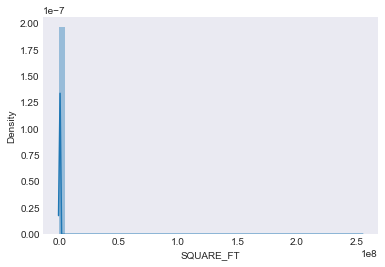

In [39]:
#Visualizing SQUARE_FT
sns.distplot(train_data.SQUARE_FT)

In [40]:
#taking log transfrom for sqere fit as the data is skiewd

train_data.SQUARE_FT = np.log1p(train_data.SQUARE_FT)
test_data.SQUARE_FT = np.log1p(test_data.SQUARE_FT)


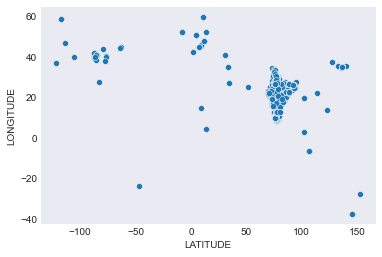

In [41]:
#Visualization of latitued and longitude

sns.scatterplot(x='LATITUDE',y='LONGITUDE',data=train_data)

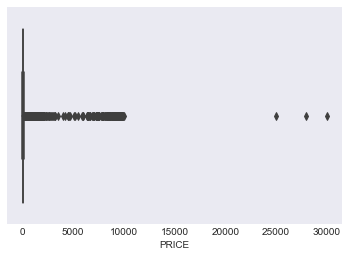

In [42]:
#Visualization of Price

sns.boxplot(train_data.PRICE)

As the price data is skewed, I will take log transformation of this feature while applying to model.

In [43]:
#After EDA, complete Train data

train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY,CITY_BIN,SQUARE_FT_BIN,AREA_CITY,AREA_CITY_BIN
0,Owner,0,0,2,2,7.171070,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,Bangalore,6,5,Bangalore5,12
1,Dealer,0,0,2,2,7.151485,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,Mysore,4,4,Mysore4,9
2,Owner,0,0,2,2,6.839647,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,Bangalore,6,3,Bangalore3,7
3,Owner,0,1,2,2,6.836175,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1,Ghaziabad,4,3,Ghaziabad3,6
4,Dealer,1,0,2,2,6.907765,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0,Kolkata,5,3,Kolkata3,7


In [44]:
#droping 'ADDRESS' 'CITY','AREA_CITY','SQUARE_FT_BIN','POSTED_BY' as these are not adding any value
#READY_TO_MOVE has high corelation with UNDER_CONSTRUCTION(after applyig model I get to know)
#BHK_OR_RK	 is least significant

train_data_cleand = train_data.drop(['ADDRESS','READY_TO_MOVE','BHK_OR_RK','CITY','AREA_CITY','SQUARE_FT_BIN','POSTED_BY'], axis = 1)
test_data_cleand = test_data.drop(['ADDRESS','READY_TO_MOVE','BHK_OR_RK','CITY','AREA_CITY','SQUARE_FT_BIN','POSTED_BY'], axis = 1)

In [45]:
#Train data after performing cleaning

train_data_cleand.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,PRICE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY_BIN,AREA_CITY_BIN
0,0,0,2,7.171070,1,12.969910,77.597960,55.0,0,0,1,6,12
1,0,0,2,7.151485,1,12.274538,76.644605,51.0,0,1,0,4,9
2,0,0,2,6.839647,1,12.778033,77.632191,43.0,0,0,1,6,7
3,0,1,2,6.836175,1,28.642300,77.344500,62.5,0,0,1,4,6
4,1,0,2,6.907765,1,22.592200,88.484911,60.5,0,1,0,5,7


In [46]:
#Test data after performing cleaning

test_data_cleand.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY_BIN,AREA_CITY_BIN
0,0,0,1,6.302933,1,21.262000,73.047700,0,0,1,4,6
1,1,1,2,6.685861,0,18.966114,73.148278,0,1,0,8,13
2,0,0,2,7.137355,1,22.592200,88.484911,0,1,0,5,8
3,0,0,3,7.245177,1,26.988300,75.584600,0,1,0,4,9
4,0,0,1,6.067216,1,22.700000,72.870000,0,0,1,2,1


In [47]:
# Creating the dependent and independent variables
train_inde = train_data_cleand.drop(['PRICE'], axis = 1)
train_dep =  train_data_cleand['PRICE']

## Step 2: Dataset Preparation (Splitting and Scaling)

The Train data has been devided into two sets in 7:3 ratio:

*   train_x, train_y (for traning the model)
*   val_x, val_y (for checking how the model is performing in unseen data)



In [48]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(train_inde,train_dep,test_size=0.30,random_state=0)

In [49]:
# Initially I applied scalling. As I have used Tree based models, I have commented out the scalling portion as it was not adding any value to my result.

# from sklearn.preprocessing import MinMaxScaler
# scaler1= MinMaxScaler().fit(train_x,train_y)

In [50]:
# train_x = scaler1.transform(train_x)
# val_x = scaler1.transform(val_x)

# Step 3: Model Selection and Evaluation

## Model 1: Random Forest Regressor 

In [51]:
#Performing gridsearch to tune the parameters for Random forest

from sklearn.ensemble import RandomForestRegressor

#Creating initial instance of RandomForestRegressor

RFModel=RandomForestRegressor()

from sklearn.model_selection import  GridSearchCV, cross_val_score, KFold

#Defining the parameter set
# c1 = {'n_estimators':range(50,200,50), 'max_depth': (5,15,3),'min_samples_leaf':(2,6,1)}
c2 = {'n_estimators':range(100,140,10), 'max_depth': (15,18,1)}

In [52]:
#fitting the train data in model 
#performing log transformation on price as price values are skewed

RFModel.fit(train_x,np.log(train_y))

#Performing grid search
grid = GridSearchCV(estimator = RFModel, param_grid=c2, cv=3, scoring = 'r2', n_jobs = -1)
grid = grid.fit(train_x,train_y)

RandomForestRegressor()

In [53]:
#best paramets from grid search

grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (15, 18, 1),
                         'n_estimators': range(100, 140, 10)},
             scoring='r2')>

In [54]:
#best estimators from grid search

grid.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=120)

In [55]:
#best score from grid search

grid.best_score_

0.9428387648247427

In [56]:
#applying the best parameter set to RFmodel

RFModel=grid.best_estimator_


In [57]:
#fitting traning values to tuned model
RFModel.fit(train_x,np.log(train_y))

RandomForestRegressor(max_depth=15, n_estimators=120)

In [58]:
#Measuring the performance with RMSE Score for RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = np.exp(RFModel.predict(train_x))
print(np.sqrt(mean_squared_error(train_y,pred_train))) # RMSE Score

pred = np.exp(RFModel.predict(val_x))
print(np.sqrt(mean_squared_error(val_y,pred))) # RMSE Score

165.4570968677473
135.2750443155253


In [59]:
#Measuring the performance with squreroot of mean squared log error Score for RandomForestRegressor

from sklearn import metrics 
print(np.sqrt(metrics.mean_squared_log_error( train_y,pred_train)))
print(np.sqrt(metrics.mean_squared_log_error( val_y,pred)))


0.19361740762563415
0.3150599151214449


In [60]:
#Measuring the performance with R2 Score for RandomForestRegressor

print(metrics.r2_score(train_y,pred_train))
print(metrics.r2_score(val_y,pred))


0.942169678924603
0.9401555676568017


<Figure size 864x576 with 0 Axes>

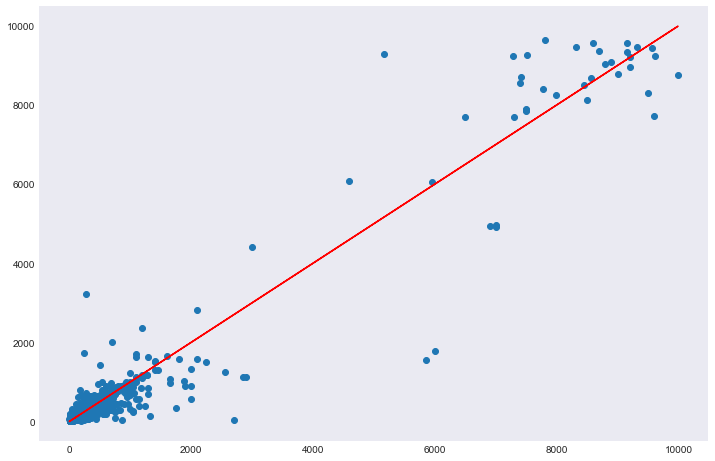

In [61]:
#plot the prediction for RandomForestRegressor

plt.figure(figsize=(12,8))
plt.scatter(val_y,pred)
plt.plot(val_y,val_y,'r')

## Model 2: Gradient Boosting Regressor

In [62]:
#Applying GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
GBModel =  GradientBoostingRegressor(random_state=0, n_estimators=160, max_depth=8, learning_rate=0.15 )

In [63]:
#fitting traning values to tuned model

GBModel.fit(train_x,np.log(train_y))

GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

In [64]:
#Measuring the performance with RMSE Score for GradientBoostingRegressor

pred_train = np.exp(GBModel.predict(train_x))
print(np.sqrt(mean_squared_error(train_y,pred_train))) # RMSE Score

pred = np.exp(GBModel.predict(val_x))
print(np.sqrt(mean_squared_error(val_y,pred))) # RMSE Score

54.454482061014176
134.42300006547222


In [65]:
#Measuring the performance with squreroot of mean squared log error Score for GradientBoostingRegressor

print(np.sqrt(metrics.mean_squared_log_error( train_y,pred_train)))
print(np.sqrt(metrics.mean_squared_log_error( val_y,pred)))

0.1829454046395731
0.29896381280212914


In [66]:
#Measuring the performance with R2 Score for GradientBoostingRegressor

print(metrics.r2_score(train_y,pred_train))
print(metrics.r2_score(val_y,pred))

0.9937359954130004
0.940907066522473


<Figure size 864x576 with 0 Axes>

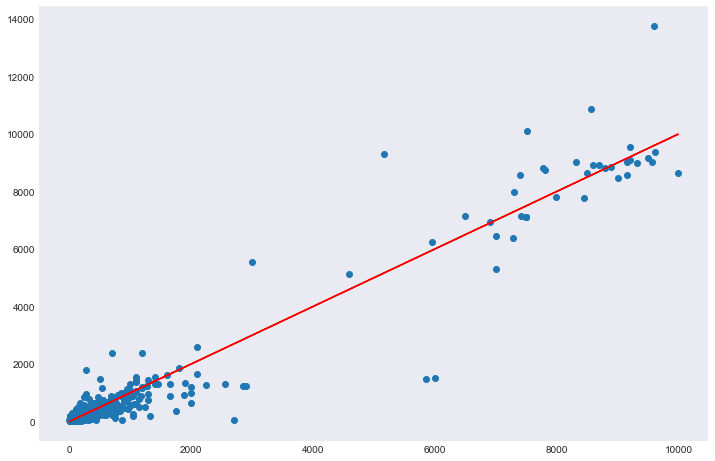

In [67]:
#plot the prediction for GradientBoostingRegressor

plt.figure(figsize=(12,8))
plt.scatter(val_y,pred)
plt.plot(val_y,val_y,'r')

After compairing the results of two models, it shows that the GradientBoostingRegressor is performing slightly better than RandomForestRegressor. 

So we will concider GradientBoostingRegressor as the final model.

Performing cross validation on GradientBoostingRegressor model to estimate the final score.

In [68]:
#7 fold Cross validation with GBModel

from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
l=[]
setused=train_inde
target=train_dep
kfold, scores = KFold(n_splits=7,random_state=True), list()
for train, test in kfold.split(setused,target):
    x_train, x_test = setused.values[train], setused.values[test]
    y_train, y_test = target.values[train], target.values[test] 
    model = GBModel
    # scaler2= MinMaxScaler().fit(x_train,y_train)
    # x_train = scaler2.transform(x_train)
    # x_test = scaler2.transform(x_test)
    model.fit(x_train, np.log(y_train))
    preds = np.exp(model.predict(x_test))
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = setused.columns,
                                        columns=['importance'])
    sum=feature_importances.values
    l.append(sum)
    score = metrics.r2_score(y_test, preds)
    scores.append(score)
    print(score)
print("Average scores are: ", np.sum(scores)/len(scores))


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.9372378333151403


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.9608593128171584


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.6264565990595328


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.8942453761686076


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.9537510430183641


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.966791993822176


GradientBoostingRegressor(learning_rate=0.15, max_depth=8, n_estimators=160,
                          random_state=0)

0.8929092903297633
Average scores are:  0.8903216355043918


This cross validation provides us an guesstimation how much my prediction can varry in unseen data.After running 7 fold cross validation, I am getting 90.63% R2 score. This score overall seems good.

12

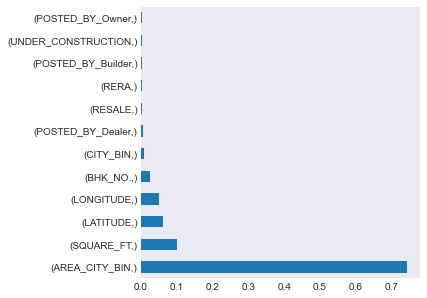

In [69]:
#Getting the feature importance

train_set=setused
labels=target
threshold=0.0005
add=0
for item in l:
  add+=item
df_cv=pd.DataFrame(add/len(l),index=train_set.columns,columns=["importance"]).sort_values('importance', ascending=False)
imp_columns=df_cv[df_cv['importance']>threshold].index.tolist()
df_cv=df_cv.reset_index()
feat_imp = pd.Series(df_cv.importance.values, index=df_cv.drop(["importance"], axis=1)).sort_values(axis='index',ascending=False)
X2=setused[imp_columns]
feat_imp.nlargest(25).plot(kind='barh', figsize=(5,5))
len(imp_columns)

Above plot shows the feature importance. From the plot it is evident that the new feature I have created combining area and city is the most important feature in predicting the house price.

However, I have made multiple modification in EDA steps and feature seletion by running the model and observing the result and feature importance.

# Step 4: Applying final model on Test Data

In [70]:
#Scaling the test data. However, we are not using it.

# test_data_cleand= scaler1.transform(test_data_cleand)

In [71]:
#Final Prediction of Price on completely unseen new dataset.

final_pred = np.exp(GBModel.predict(test_data_cleand))


In [72]:
#Convering result into new dataframe

result = pd.DataFrame()
result['TARGET(PRICE_IN_LACS)']=pd.Series(final_pred.flatten())

In [73]:
#Final Result
result.head()

,TARGET(PRICE_IN_LACS)
0,10.865646
1,75.369624
2,66.330365
3,32.602219
4,8.783280


In [74]:
# Exporting result to CSV

result.to_csv('sample_submission.csv',index=False)

I submitted the result to the following site: https://www.machinehack.com/hackathons/house_price_prediction_beat_the_benchmark/overview 

They were evaluating the score with squreroot of mean squared log error. This result set was valued with Score 0.32331. 